# Homework 4

## ASTR 5900, Fall 2017, University of Oklahoma

Remember to save this notebook as `hw4-<FirstnameLastname>.ipynb`

# Problem 1

The first problem of HW4 will involve fitting 2 models to some data, evaluating and comparing the $\chi^2$, then (optionally) constructing $\chi^2$ contour plots for certain of pairs of fit parameters.

## Part A

Load the data from `emission-line.dat` from the class GitHub repository.  Use `scipy.curve_fit` to fit a single gaussian plus a constant to the data (4 parameters total).  Print the fit parameters.  Plot the resulting Gaussian plus background over the data.

You better take a look at the `curve_fit` documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

Compute $\chi^2$ for this fit.  You may assume the error for each point is $0.05$.

In [1]:
from astropy.io import ascii
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import time

Gaussian: gauss(x,mu1,sigma1,A1): 1.43366855325,7.89797413485,6.12907226123 with a chi2: Power_divergenceResult(statistic=1.7078374824968763, pvalue=1.0)
Bimodal: gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2): 2.12865776137,13.4892854722,5.14570761266,0.514648809295,1.34484230996,1.95873831145 with a chi2: Power_divergenceResult(statistic=0.092869812388335082, pvalue=1.0)
Masked: gauss(x,mu3,sigma3,A3): 0.555293032609,-3.61773208528,6.84797004442 with a chi2: Power_divergenceResult(statistic=0.14611651396367492, pvalue=0.99999999999998113)


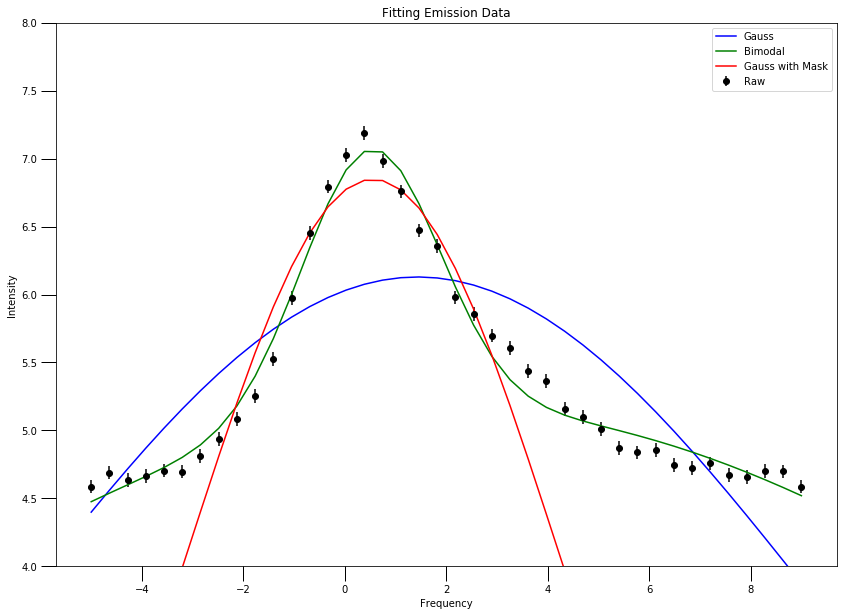

In [2]:
edata = ascii.read("emission-line.dat")

def gauss(x,mu,sigma,A):
    return A*np.exp(-(x-mu)**2/2./sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

def sigma2Gamma(sigma):
    '''Function to convert standard deviation (sigma) to FWHM (Gamma)'''
    return sigma * np.sqrt(2 * np.log(2)) * 2 / np.sqrt(2)

col1="Frequency"
col2="Intensity"

rms = np.std(edata[col2])
user_defined_mask = [-3,3]
rows = [i for i,x in enumerate(edata[col1]) if (x > user_defined_mask[0] )& (x < user_defined_mask[1])]
maskx = edata[col1][rows]
masky = edata[col2][rows]
#print(edata[col1])
#print(maskx)

_expected1=(1.,rms,1.)
_params1,_cov1=curve_fit(gauss,edata[col1],edata[col2],_expected1)
_sigma1=np.sqrt(np.diag(_cov1))

chi2_gauss=chisquare(edata[col2],gauss(edata[col1],*_params1))

print('Gaussian: gauss(x,mu1,sigma1,A1): ' + ','.join(map(str,_params1)) + " with a chi2: " + str(chi2_gauss))

_expected2=(1.,rms,1.,1.,rms,1.)
_params2,_cov2=curve_fit(bimodal,edata[col1],edata[col2],_expected2)
_sigma2=np.sqrt(np.diag(_cov2))
chi2_bimodal=chisquare(edata[col2],bimodal(edata[col1],*_params2))

print('Bimodal: gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2): ' + ','.join(map(str,_params2)) + " with a chi2: " + str(chi2_bimodal))

_params3,_cov3=curve_fit(gauss,maskx,masky,_expected1)
_sigma3=np.sqrt(np.diag(_cov3))

chi3_gauss=chisquare(masky,gauss(maskx,*_params3))

print('Masked: gauss(x,mu3,sigma3,A3): ' + ','.join(map(str,_params3)) + " with a chi2: " + str(chi3_gauss))


#print("Cov 1: {}".format(_cov1))
#print("Cov 2: {}".format(_cov2))

plt.clf()
plt.figure(figsize=(14,10))

plt.title("Fitting Emission Data")
plt.xlabel("Frequency")
plt.ylabel("Intensity")
plt.tick_params('both', which='major', length=15, width=1)
plt.tick_params('both', which='minor', length=7.5, width=1)
plt.ylim(4,8)

plt.errorbar(edata[col1], edata[col2], yerr=0.05, fmt='o',label="Raw",color="black")

line1 = plt.plot(edata[col1],gauss(edata[col1],*_params1),color='blue',label='Gauss')

line2 = plt.plot(edata[col1],bimodal(edata[col1],*_params2),color='green',label='Bimodal')

line3 = plt.plot(edata[col1],gauss(edata[col1],*_params3),color='red',label='Gauss with Mask')

plt.legend()
plt.show()

amplitude = [_params1[0],_params2[0],_params2[2]]
fwhm = [sigma2Gamma(_params1[2]),sigma2Gamma(_params2[2]),sigma2Gamma(_params2[5])]

## Part B

Now fit *two* gaussians to the data, print all of the fit parameters, and plot the new fit over the data.

Compute the new $\chi^2$.  How does this compare to the previous?  Briefly discuss.

### Answer

The two Chi^2 are very different with the bimodal chi2 
demonstrating how well the bimodal fits the data compared to the single gaussian. 
I actually think this data looks like the fourier transform of sky
brightness so a bessel function would probably fit the wings better than this bimodal.

Back to the fits we have actually done, I also think the gaussian function could be fit a lot better, but it is the wings that are throwing it off, which could be due to a number of issues. If we are dealing with a fourier transform then we will get sidelobes which we could safely ignore. If this is the case, a mask should be applied to the data to only consider the region roughly [-2,4]. A gaussian would be able to reasonably fit this area.

### Part C (Extra Credit)

Using the covariance matrix returned by `scipy.curve_fit`, construct a $\chi^2$ contour plot that yields 95% confidence for two parameters of interest: first for the amplitudes of the two Gaussians, then for the widths of the Gaussians.

### Aside
I got the prob values from https://people.richland.edu/james/lecture/m170/tbl-chi.html
So you asked for the width of the gaussian, which is the FWHM, which is related to the sigma values through 

sigma x sqrt(2 x log(2)) x 2 / sqrt(2)

Eigenval1: [ 0.28156283  0.0605326   0.00784805]
Eigenval2: [  1.05237711e+00   4.15740259e-02   4.39067082e-03   2.73999775e-03
   2.09236046e-03   3.29320151e-04]
Position: 1.43366855325,10.2055747464
Ampl Axis: 0.038418576187 , FWHM Axis: 0.493414277816


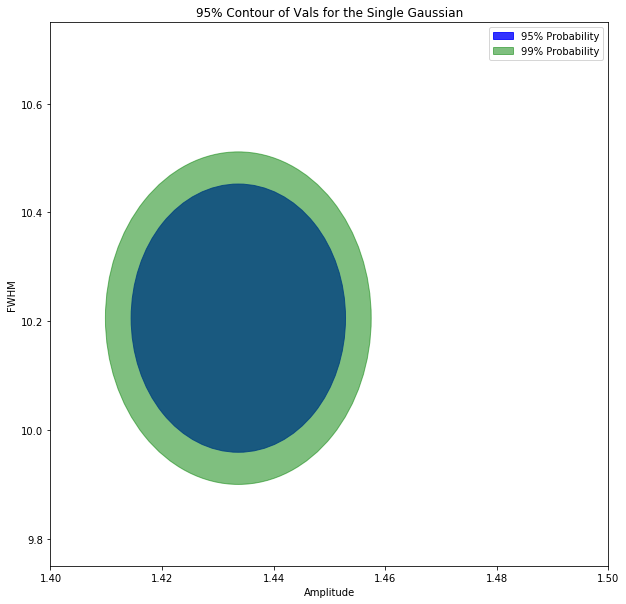

In [3]:
from matplotlib.patches import Ellipse
eigval1, eigvect1 = np.linalg.eig(_cov1)
eigval2, eigvect2 = np.linalg.eig(_cov2)

print("Eigenval1: {}".format(eigval1))
print("Eigenval2: {}".format(eigval2))

prob95 = 5.991
prob99 = 9.210
ells1 = Ellipse(xy=(amplitude[0],fwhm[0]), width=2*eigval1[2]*np.sqrt(prob95), height=2*sigma2Gamma(eigval1[1])*np.sqrt(prob95),label="95% Probability",color="blue")
ells2 = Ellipse(xy=(amplitude[0],fwhm[0]), width=2*eigval1[2]*np.sqrt(prob99), height=2*sigma2Gamma(eigval1[1])*np.sqrt(prob99),label="99% Probability",color="green")

print("Position: {},{}".format(amplitude[0],fwhm[0]))
print("Ampl Axis: {} , FWHM Axis: {}".format(2*eigval1[2]*np.sqrt(5.991),2*sigma2Gamma(eigval1[1])*np.sqrt(5.991)))

plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
fig.gca().add_artist(ells1)
fig.gca().add_artist(ells2)
ax.set_title("95% Contour of Vals for the Single Gaussian")
ax.set_xlabel("Amplitude")
ax.set_ylabel("FWHM")
ells1.set_alpha(.8)
ells2.set_alpha(.5)
ells1.set_visible(True)
ells2.set_visible(True)
ax.set_xlim(1.4,1.5)
ax.set_ylim(9.75,10.75)
plt.legend(handles=[ells1,ells2])
plt.show()

#plt.clf()
#plt.figure()
#ax = plt.gca()#

#ellipse = Ellipse(xy=(5, 5), width=0.036, height=0.012, 
#                        edgecolor='r', fc='None', lw=2)
#ax.add_patch(ellipse)
#ax.set_xlim(4.95,5.05)
#ax.set_ylim(4.95,5.05)
#plt.draw()
#plt.show()

# Problem 2

You are to perform bootstrap analysis on photon arrival time data from an unknown source in the sky, very loosely based on this paper: http://adsabs.harvard.edu/abs/1984MNRAS.210P..19B

### Part A

Load the arrival time data in `arrival-times.dat` from the class GitHub repository.  Write a function that takes an array-like structure of arrival times as an argument and returns the binned number of arrival time pairs for a given time difference (in other words, return bin values with their respective bin positions).  This function $N(t)$ will be our effective correlation function.

We want to fit a power-law to this correlation function.  Find the slope of best-fit if the the correlation function was on a log-log plot.  Construct the corresponding log-log plot with the line fit.


Length of Data: 1049076
L mbins: 100, L C: 100


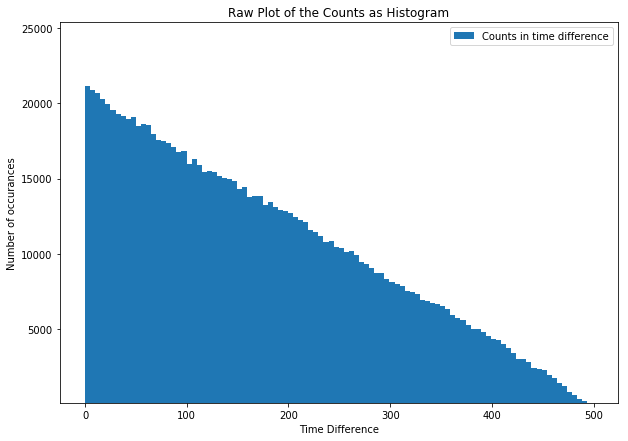

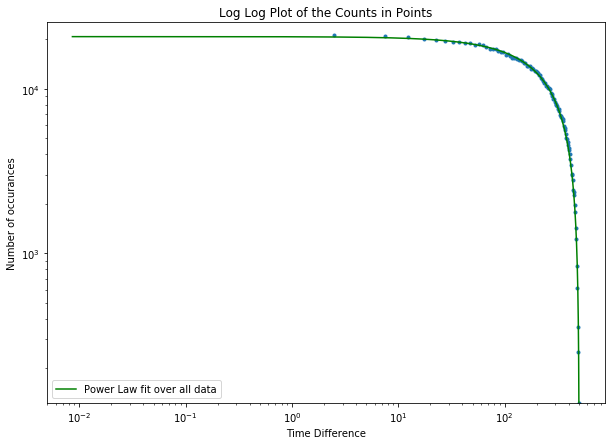

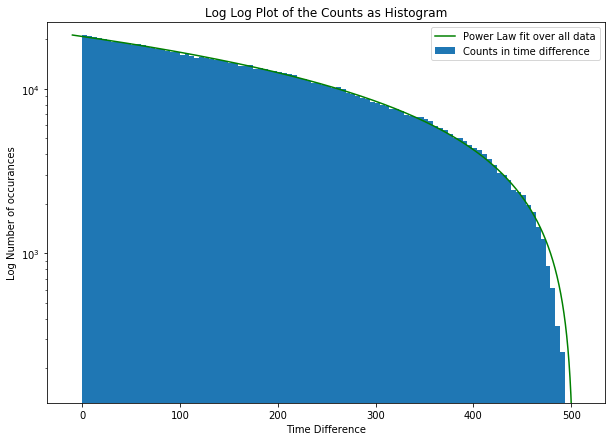

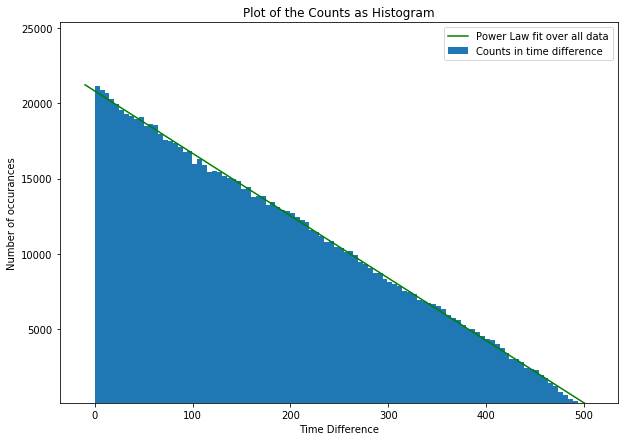

P1: [   -41.35855265  20804.13548231], X^2: Power_divergenceResult(statistic=843.37038951029535, pvalue=1.9561251536440442e-118)
function took 14.702 s


In [7]:
# assuming header says "Times"
def linear(x,a,b):
    return a*x+b

def main(timedif,Plot=True,Verbosity=True):

    if Plot:
        #vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
        plt.clf()
        plt.figure(figsize=[10,7]) 
        
    time1 = time.time()
    counts,bins,ignored= plt.hist(timedif, bins=100, label='Counts in time difference')
    mbins = 0.5*(bins[1:] + bins[:-1])
    _expected1=(1.,1.)
    if Verbosity:
        print("L mbins: {}, L C: {}".format(len(mbins),len(counts)))
    _params1,_cov1=curve_fit(linear,mbins,counts,_expected1)
    _sigma1=np.sqrt(np.diag(_cov1))
    chi2_powerlaw1=chisquare(counts,linear(mbins,*_params1))
    time2 = time.time()
    if (time2 - time1) > 15 :
        print("Long Time from start inside mean function: {}s".format(int(time2-time1)))
        
    if Plot:
        plt.title("Raw Plot of the Counts as Histogram")
        plt.xlabel("Time Difference")
        plt.ylabel("Number of occurances")
        plt.legend()
        plt.ylim(min(counts),max(counts)*1.2)
        plt.draw()
        plt.show()
        x = np.linspace(bins[0]-2*abs(bins[0]-bins[1]),bins[len(bins)-1]+2*abs(bins[0]-bins[1]),500*len(bins))
        #^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        #vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
        plt.clf()
        plt.figure(figsize=[10,7])
        plt.title("Log Log Plot of the Counts in Points")
        plt.loglog(mbins,counts,'.')
        line1 = plt.plot(x,linear(x,*_params1),color='green',label='Power Law fit over all data')

        plt.xlabel("Time Difference")
        plt.ylabel("Number of occurances")
        plt.legend()
        plt.ylim(min(counts),max(counts)*1.2)
        plt.draw()
        plt.show()
        #^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        #vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
        plt.clf()
        plt.figure(figsize=[10,7])
        
        
        counts, logbins, logignored= plt.hist(timedif, bins=100,  log=True, label='Counts in time difference')

        line1 = plt.plot(x,linear(x,*_params1),color='green',label='Power Law fit over all data')
        plt.title("Log Log Plot of the Counts as Histogram")
        plt.xlabel("Time Difference")
        plt.ylabel("Log Number of occurances")
        plt.ylim(min(counts),max(counts)*1.2)
        plt.legend()
        plt.yscale('log')
        plt.draw()
        plt.show()
        #^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        #vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
        plt.clf()
        plt.figure(figsize=[10,7]) 

        counts,bins,ignored= plt.hist(timedif,bins=100,label='Counts in time difference')

        line1 = plt.plot(x,linear(x,*_params1),color='green',label='Power Law fit over all data')
        plt.title("Plot of the Counts as Histogram")
        plt.xlabel("Time Difference")
        plt.ylabel("Number of occurances")
        plt.legend()
        plt.ylim(min(counts),max(counts)*1.2)
        plt.draw()
        plt.show()
        #^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    
    if Verbosity:
        print("P1: {}, X^2: {}".format(_params1,chi2_powerlaw1))
          
    return _params1

    
#################
time1p = time.time()
edata = ascii.read("arrival-times.dat")
times=[]

for i in edata["Times"]:
    for j in edata["Times"]:
        if j > i :
            times.append(j-i)
print("Length of Data: {}".format(len(times)))

parameters = main(times,True,True)
time2p = time.time()

print('function took %0.3f s' % (time2p-time1p))

### Part B - Bootstrap

We want to find the dispersion of this power law.

Generate $200$ bootstrap samples of the arrival times you loaded at the beginning of the assignment.  For each bootstrap sample, fit a line and record the slope.  Evaluate the dispersion of the slope, and plot a histogram of your bootstrapped slopes.  Is the dispersion result valid? Why or why not?  Briefly discuss.

Note the bootstrap process may take several minutes.

In [9]:
n = len(times)
reps = 200
parameters = []
print("Total: {}".format(reps))
print("Approx Time: {}s".format(int((time2p-time1p)*reps/3.)))
j=0
'''
# This is for speeding up the process if a lot of bootstraps are used.Otherwise use below
#  Careful can eat memory fast and send computer into a panic if swap is used up

import multiprocessing as mp.

N_p = mp.cpu_count()
if N_p > 3:
    N_p = 3
b_channel = np.zeros(N_p)
e_channel = np.zeros(N_p)
num_channels = len(bootstraps)/N_p
for i in range(0,N_p):
    b_channel[i] = num_channels * i
    e_channel[i] = num_channels * i + num_channels
    if i == N_p -1:
        e_channel[i] = len(bootstraps)
pool = mp.Pool(processes = N_p)

results = [pool.apply_async(main,args=(bootstraps[int(b_channel[x]):int(e_channel[x])],np.log10(bootstraps[int(b_channel[x]):int(e_channel[x])]),False,True)) for x in range(0,N_p)]

temp = [p.get() for p in results]
temp.sort()
output = [r[1] for r in temp]
parameters = concatenate((output),axis=0)
print parameters
'''
time1 = time.time()
while j < reps:
    counter = 0
    xb = np.random.choice(times, (1,n))
    while min(xb[0]) < 0.:
        xb = np.random.choice(times, (1,n))
        counter += 1
        if counter%5 ==0:
            print("reseting xb a lot")
    temp1 = main(xb[0],False,False)
    parameters.append(temp1)
    temp1=None
    xb = None
    time2 = time.time()
    print("{} /{}".format(j+1,reps)+"   Actual time from start: {}s".format(int(time2-time1)))
    j +=1
    
print "DONE"
    
#print parameters
#params slope constant

Total: 200
Approx Time: 980s
1 /200   Actual time from start: 1s
2 /200   Actual time from start: 2s
3 /200   Actual time from start: 4s
4 /200   Actual time from start: 5s
5 /200   Actual time from start: 7s
6 /200   Actual time from start: 8s
7 /200   Actual time from start: 10s
8 /200   Actual time from start: 12s
9 /200   Actual time from start: 14s
10 /200   Actual time from start: 15s
11 /200   Actual time from start: 17s
12 /200   Actual time from start: 19s
13 /200   Actual time from start: 21s
14 /200   Actual time from start: 22s
15 /200   Actual time from start: 24s
16 /200   Actual time from start: 26s
17 /200   Actual time from start: 28s
18 /200   Actual time from start: 30s
19 /200   Actual time from start: 32s
20 /200   Actual time from start: 33s
21 /200   Actual time from start: 35s
22 /200   Actual time from start: 37s
23 /200   Actual time from start: 40s
24 /200   Actual time from start: 42s
25 /200   Actual time from start: 44s
26 /200   Actual time from start: 46

Long Time from start inside mean function: 22s
163 /200   Actual time from start: 1587s
Long Time from start inside mean function: 23s
164 /200   Actual time from start: 1611s
Long Time from start inside mean function: 22s
165 /200   Actual time from start: 1634s
Long Time from start inside mean function: 22s
166 /200   Actual time from start: 1657s
Long Time from start inside mean function: 23s
167 /200   Actual time from start: 1681s
Long Time from start inside mean function: 25s
168 /200   Actual time from start: 1707s
Long Time from start inside mean function: 23s
169 /200   Actual time from start: 1732s
Long Time from start inside mean function: 24s
170 /200   Actual time from start: 1756s
Long Time from start inside mean function: 24s
171 /200   Actual time from start: 1781s
Long Time from start inside mean function: 24s
172 /200   Actual time from start: 1806s
Long Time from start inside mean function: 24s
173 /200   Actual time from start: 1832s
Long Time from start inside mean

In [10]:
# saving results just incase I have to stop and restart later, don't
# have to redo everything
col1 = [x[0] for x in parameters]
col2 = [x[1] for x in parameters]
temp = Table([col1,col2],names=['slopes','constants'])
ascii.write(temp,'.TMP_FILE')
temp = None
col1 = None
col2 = None

In [ ]:
temp = ascii.read('.TMP_FILE')
parameters = [[x[0],x[1]] for x in temp]


In [11]:
bootstrapslopes = [x[0] for x in parameters]
slopestd = np.std(bootstrapslopes)
slopeavg = np.average(bootstrapslopes)
print("Std in slope: {}".format(slopestd))
print("Avg Slope: {}".format(slopeavg))

Std in slope: 0.0564641993548
Avg Slope: -41.3470464874


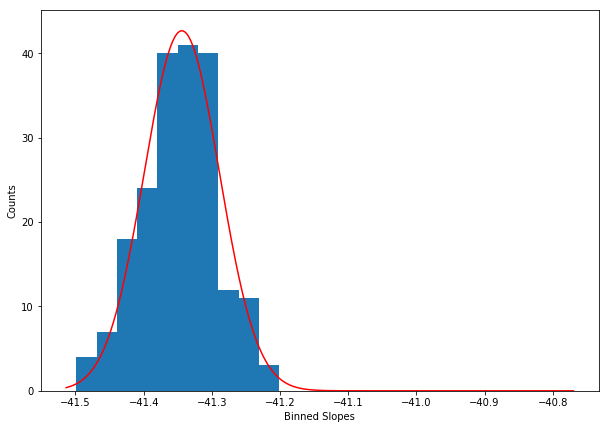

Chi2: 3513.91505027


In [15]:
plt.clf()
plt.figure(figsize=[10,7])
plt.ylabel("Counts")
plt.xlabel("Binned Slopes")

bcounts, bbins, bignored= plt.hist(bootstrapslopes, label='Histogram of Slopes')
mbins = 0.5*(bbins[1:] + bbins[:-1])
x = np.linspace(mbins[0]-abs(mbins[0]-mbins[1]),mbins[len(mbins)-1]+15*abs(mbins[0]-mbins[1]),500*len(mbins))

_expected1=(slopeavg,slopestd,1.)
_params1,_cov1=curve_fit(gauss,mbins,bcounts,_expected1)
_sigma1=np.sqrt(np.diag(_cov1))
line1 = plt.plot(x,gauss(x,_params1[0],_params1[1],_params1[2]),color='red',label='Gauss')

plt.ylim(0,1.1*max(bcounts))
plt.show()

chi1_gauss=0
for i,j in enumerate(mbins):
    y = gauss(mbins[i],_params1[0],_params1[1],_params1[2])
    chi1_gauss += (y - j)**2 / y
    y=0
print("Chi2: {}".format(chi1_gauss))

The dispersion result is fairly valid as generally the slopes follow a gaussian distribution. If more samples were taken it would tend closer to a gaussian. it doesn't fit the wings that well rightnow but that is to be expected with the low sample size.